# RRN, LSTM & GRU Model

- Newyork Taxi Dataset

In [1]:
'''The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, 
pickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup 
and dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether 
the trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks 
like predicting trip duration or analyzing taxi ride patterns.'''

'The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, \npickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup \nand dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether \nthe trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks \nlike predicting trip duration or analyzing taxi ride patterns.'

### Step 1: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

### Step 2: Data Preparation

In [3]:
df = pd.read_csv("ny_taxi_data.csv")

In [4]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N
...,...,...,...,...,...,...,...,...,...,...
16095,id1197632,1,27-05-2016 09:38,27-05-2016 09:48,1,-73.940025,40.751556,-73.970116,40.754772,N
16096,id3503918,2,07-01-2016 20:42,07-01-2016 20:55,1,-73.963051,40.799149,-73.953934,40.766590,N
16097,id2857349,1,10-01-2016 15:41,10-01-2016 15:47,1,-73.912605,40.774769,-73.922478,40.765701,N
16098,id3803774,1,20-01-2016 16:25,20-01-2016 16:37,1,-73.983444,40.755722,-73.978958,40.782188,N


In [5]:
df['passenger_count'].value_counts()

passenger_count
1    11371
2     2357
5      866
3      638
6      541
4      327
Name: count, dtype: int64

In [6]:
data = df['passenger_count'].values

In [7]:
data.shape

(16100,)

In [8]:
np.unique(data,return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=int64),
 array([11371,  2357,   638,   327,   866,   541], dtype=int64))

### Step 3: Data Preprocessing

In [9]:
scaler = MinMaxScaler()
data_ss = scaler.fit_transform(data.reshape(-1,1))

In [12]:
sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

### Step 4: Build and Train RNN Model

In [17]:
model_rnn= keras.Sequential(name='RNN')
model_rnn.add(keras.layers.SimpleRNN(100,activation='relu',input_shape=(X_train.shape[1],1)))
model_rnn.add(keras.layers.Dense(1))



C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model_rnn.summary()

Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_rnn.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6751
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7276
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7007
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7198
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6769
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6478
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7021
Epoch 8/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7781
Epoch 9/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7076
Epoch 10/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7173
Epoch 11/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7091
Epoch 12/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7469
Epoch 13/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7198
Epoch 14/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7642
Epoch 15/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1

### Step 5: Build and Train LSTM Model

In [27]:
model_lstm=keras.Sequential(name='LSTM')
model_lstm.add(keras.layers.LSTM(100,activation='relu',input_shape=(X_train.shape[1],1)))
model_lstm.add(keras.layers.Dense(1))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model_lstm.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
model_lstm.summary()

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_lstm.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7400
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6855
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7514
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6835
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7207
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7388
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7987
Epoch 8/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7785
Epoch 9/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7045
Epoch 10/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6917
Epoch 11/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7430
Epoch 12/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7737
Epoch 13/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6942
Epoch 14/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7411
Epoch 15/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1

In [31]:
model_gru=keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100,activation='relu',input_shape=(X_train.shape[1],1)))
model_gru.add(keras.layers.Dense(1))


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model_gru.compile(optimizer='adam',loss='mean_squared_error')

In [35]:
model_gru.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.2869
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7083
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7081
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7859
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7418
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7258
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7666
Epoch 8/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7353
Epoch 9/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7232
Epoch 10/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7664
Epoch 11/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7525
Epoch 12/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7464
Epoch 13/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8292
Epoch 14/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7920
Epoch 15/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1

### Step 7: Evaluate the models

In [37]:
def evaluate_model(model,X_test,y_test):
    X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_pred = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
    mse = mean_squared_error(y_test,y_pred)

    return mse


mse_rnn = evaluate_model(model_rnn,X_test,y_test)
mse_lstm = evaluate_model(model_lstm,X_test,y_test)
mse_gru = evaluate_model(model_gru,X_test,y_test)


print(f"RNN Mean Squared Error:{mse_rnn}")
print(f"LSTM Mean Squared Error:{mse_lstm}")
print(f"GRU Mean Squared Error:{mse_gru}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN Mean Squared Error:84.78254116185151
LSTM Mean Squared Error:84.78254116185151
GRU Mean Squared Error:84.78254116185151


### Step 8: Visualization

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


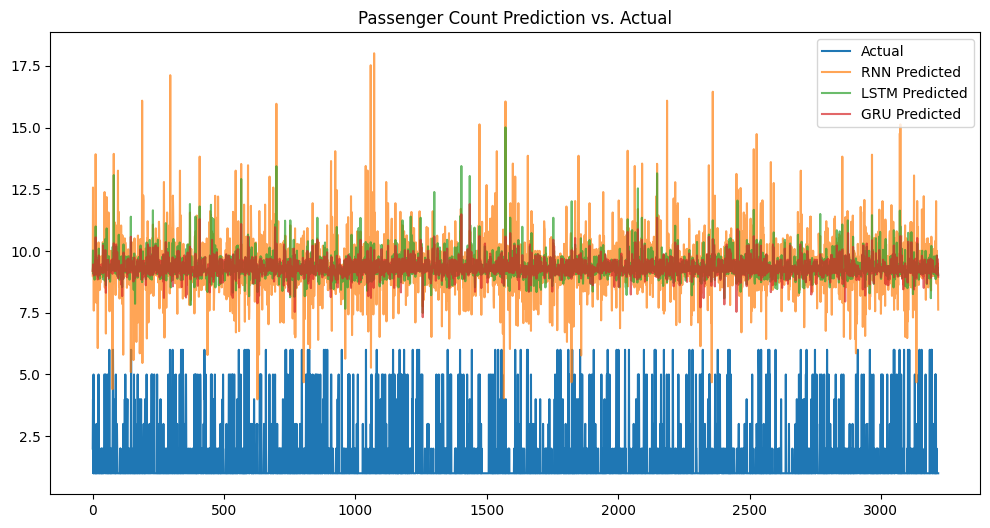

In [41]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()